# Data analysis for MSc5_research_project 

This jupyter notebook deals with analysing the data for my research project within the MSc05 course in the Neurocognitive Psychology lab at Goethe University Frankfurt within the psychology master degree program.

Just to repeat briefly, the aim of the project is to use machine learning in order to predict whether a particpant can be classified either as control or patient with psychotic disorder based on different brain modalities. Before starting with our first modality being **cortical thickness (CT)**, the learning problem and the task type should be defined to know which model suits the best for the purpose of the project aim.

## 1. Learning problem and task type

Following the scikit-learn algorhitm cheat-sheet, for the data at hand the performance of a **linear SVM** is recommended. The data contains more than 50 participants (samples), the aim is to predict a category (control/patient) and the data is labeled. 
Since I want to use the given information regarding the labels for each sample, the learning problem is **supervised**. Considering the task type, our purpose is to classify the samples in two categories being control and patient. Hence, the task type is **classification**.

SVMs are a set of supervised learning methods used that can be used for classifcation, regression and outliers detection (for further information click here). The basic idea is to find an optimal separating line (or hyperplane) as output that separates the data into two classes. The SVM algorithm looks for the data points that are the clostest to the line from both classes. These points are called support vectors. Then, the distance between the support vectors and the hyperplane which is called the margin is computed. To find the best and optimal hyperplane, the margin should be maximized.


Support vector classification(SVC) or Linear Support vector classification (LinearSVC) are methods of SVMs making it feasible to perfom a binary or mulit-class classification on a dataset. For the purpose of this project, LinearSVC is going to be performed.

### 1.1 Macro-structural data: Cortical Thickness (CT)

First of all, I use CT data as my input data for the classification.


In [42]:
import pandas as pd

#load CT data

CT = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [43]:
#adjust data frame 

CT_adj = CT.drop(['Subject ID','Age', 'Sex'], axis=1)


In [44]:
#label group 1 as control and 2 as patient

CT_adj['Group'] = CT_adj['Group'].replace([1,2],['control', 'patient'])

In [45]:
CT_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,control,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,control,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,control,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,patient,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,patient,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,patient,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,patient,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,patient,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,patient,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [46]:
CT_adj.shape

(108, 309)

In [47]:
#print the names of the 308 features

print("Features: ", CT_adj.columns[2:308])

Features:  Index(['lh_bankssts_part2_thickness',
       'lh_caudalanteriorcingulate_part1_thickness',
       'lh_caudalmiddlefrontal_part1_thickness',
       'lh_caudalmiddlefrontal_part2_thickness',
       'lh_caudalmiddlefrontal_part3_thickness',
       'lh_caudalmiddlefrontal_part4_thickness', 'lh_cuneus_part1_thickness',
       'lh_cuneus_part2_thickness', 'lh_entorhinal_part1_thickness',
       'lh_fusiform_part1_thickness',
       ...
       'rh_supramarginal_part4_thickness', 'rh_supramarginal_part5_thickness',
       'rh_supramarginal_part6_thickness', 'rh_supramarginal_part7_thickness',
       'rh_frontalpole_part1_thickness', 'rh_temporalpole_part1_thickness',
       'rh_transversetemporal_part1_thickness', 'rh_insula_part1_thickness',
       'rh_insula_part2_thickness', 'rh_insula_part3_thickness'],
      dtype='object', length=306)


In [48]:
#print the names of the labels

print("Labels: ", CT_adj['Group'])

Labels:  0      control
1      control
2      control
3      patient
4      patient
        ...   
103    patient
104    patient
105    patient
106    patient
107    patient
Name: Group, Length: 108, dtype: object


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
CT_data = CT_adj[0:308]
CT_target = CT_adj['Group']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(CT_data, CT_target, test_size=0.3,random_state=109)

In [52]:
from sklearn import svm

In [53]:
clf = svm.SVC(kernel='linear')

In [54]:
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'patient'

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))


In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred))


## Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/mello/Desktop/Dataset/PARC_500.aparc_thickness_Dublin.csv', delimiter = ',')

In [3]:
df

,Subject ID,Age,Sex,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,CON9225,21,2,1,2.180,2.382,2.346,2.526,2.747,2.544,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,CON9229,28,2,1,2.394,1.973,2.534,2.439,2.485,2.435,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,CON9231,29,2,1,2.551,2.567,1.954,2.439,2.428,2.190,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,GASP3037,61,1,2,2.187,1.923,2.160,2.410,2.381,2.277,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,GASP3040,47,1,2,1.862,1.750,2.129,2.516,2.244,2.169,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,RPG9019,31,1,2,2.240,2.150,1.995,2.254,2.164,2.008,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,RPG9102,42,2,2,2.269,2.124,2.531,2.502,2.250,2.183,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,RPG9119,41,1,2,2.273,2.559,2.578,2.463,2.463,2.053,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,RPG9121,51,1,2,1.940,2.438,2.272,2.272,2.610,2.099,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [6]:
#adjust dataframe

df_adj = df.drop(['Subject ID','Age', 'Sex'], axis=1)

In [7]:
df_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,1,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,1,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,1,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,2,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,2,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,2,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,2,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,2,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [8]:
#label group 1 as 0 and 2 as 1

df_adj['Group'] = df_adj['Group'].replace([1,2],[0, 1])

In [9]:
df_adj

,Group,lh_bankssts_part1_thickness,lh_bankssts_part2_thickness,lh_caudalanteriorcingulate_part1_thickness,lh_caudalmiddlefrontal_part1_thickness,lh_caudalmiddlefrontal_part2_thickness,lh_caudalmiddlefrontal_part3_thickness,lh_caudalmiddlefrontal_part4_thickness,lh_cuneus_part1_thickness,lh_cuneus_part2_thickness,...,rh_supramarginal_part5_thickness,rh_supramarginal_part6_thickness,rh_supramarginal_part7_thickness,rh_frontalpole_part1_thickness,rh_temporalpole_part1_thickness,rh_transversetemporal_part1_thickness,rh_insula_part1_thickness,rh_insula_part2_thickness,rh_insula_part3_thickness,rh_insula_part4_thickness
0,0,2.180,2.382,2.346,2.526,2.747,2.544,2.582,1.816,2.228,...,2.817,2.325,2.430,3.004,3.979,2.329,3.620,2.776,3.282,3.347
1,0,2.394,1.973,2.534,2.439,2.485,2.435,2.458,1.723,1.821,...,2.611,2.418,2.317,2.794,3.851,2.034,3.588,2.654,3.124,3.214
2,0,2.551,2.567,1.954,2.439,2.428,2.190,2.377,2.026,1.800,...,2.777,2.309,2.390,2.365,4.039,2.337,3.657,2.495,2.669,2.886
3,1,2.187,1.923,2.160,2.410,2.381,2.277,2.361,1.585,1.750,...,2.265,2.306,2.129,2.281,3.505,2.275,3.121,2.333,2.604,2.731
4,1,1.862,1.750,2.129,2.516,2.244,2.169,2.220,1.646,1.717,...,2.582,2.314,2.047,2.389,3.272,2.445,3.171,2.216,2.659,2.657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,2.240,2.150,1.995,2.254,2.164,2.008,2.298,1.918,1.717,...,2.273,2.288,2.395,2.105,3.267,2.257,3.231,2.574,2.920,2.899
104,1,2.269,2.124,2.531,2.502,2.250,2.183,2.408,1.539,1.611,...,2.302,2.182,2.182,2.327,2.881,2.124,3.159,2.450,2.753,2.791
105,1,2.273,2.559,2.578,2.463,2.463,2.053,2.526,1.733,1.859,...,2.534,2.604,2.449,2.370,3.111,2.190,3.480,2.294,2.571,2.875
106,1,1.940,2.438,2.272,2.272,2.610,2.099,2.538,1.931,1.792,...,2.638,2.225,2.013,2.115,3.853,2.231,3.187,2.510,2.759,2.838


In [11]:
#get shape of df_adj

df_adj.shape

(108, 309)

In [13]:
df_adj['Group'].value_counts()

0    80
1    28
Name: Group, dtype: int64

<AxesSubplot:xlabel='Group', ylabel='count'>

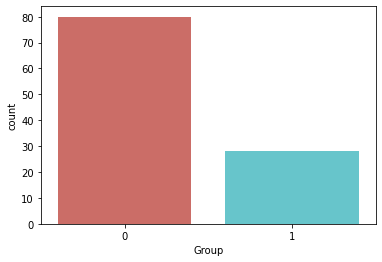

In [15]:
import seaborn as sns

sns.countplot(x='Group', data = df_adj, palette='hls')

In [16]:
df_adj.to_numpy()

array([[0.   , 2.18 , 2.382, ..., 2.776, 3.282, 3.347],
       [0.   , 2.394, 1.973, ..., 2.654, 3.124, 3.214],
       [0.   , 2.551, 2.567, ..., 2.495, 2.669, 2.886],
       ...,
       [1.   , 2.273, 2.559, ..., 2.294, 2.571, 2.875],
       [1.   , 1.94 , 2.438, ..., 2.51 , 2.759, 2.838],
       [1.   , 2.108, 2.269, ..., 2.551, 2.855, 2.985]])

In [70]:
#define input

X = df_adj.iloc[:,1:308].values

In [71]:
X

array([[2.18 , 2.382, 2.346, ..., 3.62 , 2.776, 3.282],
       [2.394, 1.973, 2.534, ..., 3.588, 2.654, 3.124],
       [2.551, 2.567, 1.954, ..., 3.657, 2.495, 2.669],
       ...,
       [2.273, 2.559, 2.578, ..., 3.48 , 2.294, 2.571],
       [1.94 , 2.438, 2.272, ..., 3.187, 2.51 , 2.759],
       [2.108, 2.269, 2.145, ..., 3.192, 2.551, 2.855]])

In [130]:
X.shape

(108, 307)

In [84]:
#output

y = df_adj.iloc[:,[0]].values

In [85]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [95]:
y = y.ravel()

In [96]:
y.shape

(108,)

In [103]:
#split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [104]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)
  
print(xtrain)
print(xtest)

[[ 3.05831735  1.57472533  0.97751966 ...  0.69306214 -0.43012507
   1.3016343 ]
 [-0.42752542  0.49195636  0.98566147 ...  1.07033991  2.01003971
   1.46144259]
 [ 0.39552079 -1.33548374 -0.27631893 ...  0.35171559  1.52940119
  -0.4653888 ]
 ...
 [ 0.48354712  1.22378835  0.41980575 ...  1.0613571  -0.78341492
   0.96375391]
 [ 0.5055537  -0.06012741  0.48086931 ... -0.0884418   0.73244502
   0.21493792]
 [-1.56746643 -0.52233709 -2.69850711 ... -0.38038293  0.2887787
  -0.21882744]]
[[ 0.47034317 -0.3468686  -1.8761844  ... -1.04511043 -1.42837429
  -0.92654987]
 [ 1.42102756 -0.2569945  -1.82733354 ...  0.29332736 -0.27402025
  -1.33748547]
 [ 0.80484323  1.75447353 -0.92766365 ...  0.61670831  0.21483431
  -0.15490412]
 ...
 [-0.19425564  0.60750878  0.87981796 ...  1.43863487 -0.17953575
  -0.29644861]
 [-0.64318994 -1.69070043 -1.14342159 ... -1.47179362 -1.2969176
  -1.80777844]
 [-0.26027539  0.48767665  1.35204288 ... -0.09293321  0.55169207
   1.42034903]]


In [107]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver ='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [108]:
y_pred=logreg.predict(X_test)

In [109]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[18  1]
 [ 6  2]]


In [111]:
cm

array([[18,  1],
       [ 6,  2]])

Text(0.5, 257.44, 'Predicted label')

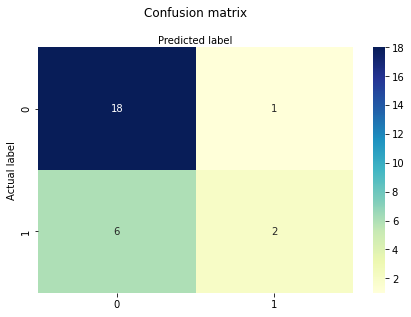

In [116]:
class_names=[0,1]

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [121]:
from sklearn import metrics 


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.7407407407407407
Precision: 0.6666666666666666
Recall: 0.25
